In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder #LabelEncoder 


In [156]:
data = pd.read_csv('D:\Vehicles0515.csv', on_bad_lines = 'skip')
df = pd.read_csv('D:\Accidents0515.csv', on_bad_lines = 'skip')
data2 = pd.read_csv('D:\Casualties0515.csv', on_bad_lines = 'skip')

In [157]:

column_to_copy = data2['Casualty_Severity']
data['Casualty_Severity'] = column_to_copy

column_to_copy = df['Accident_Severity']
data['Accident_Severity'] = column_to_copy

column_to_copy = df['Road_Type']
data['Road_Type'] = column_to_copy

another_column_to_copy = df['Did_Police_Officer_Attend_Scene_of_Accident']
data['Did_Police_Officer_Attend_Scene_of_Accident'] = column_to_copy

In [4]:
data.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,10,-1,-1,-1,7,1,2.0,2.0,6.0,6.0
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,7,8268,2,3,-1,-1,3.0,3.0,3.0,3.0
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,6,8300,2,5,2,1,3.0,3.0,6.0,6.0
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,9,1762,1,6,1,1,3.0,3.0,6.0,6.0
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,8,1769,1,4,2,1,3.0,3.0,6.0,6.0


# clean invalid data

<Axes: >

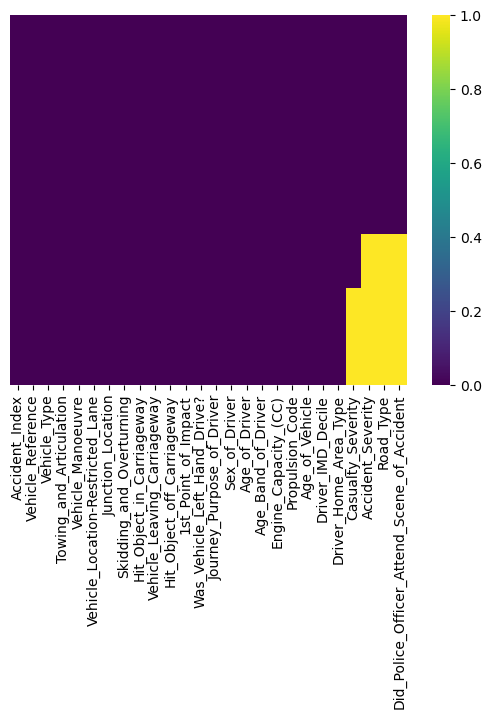

In [5]:
sns.heatmap(data.isnull(), yticklabels = False, cmap = "viridis")

<Axes: >

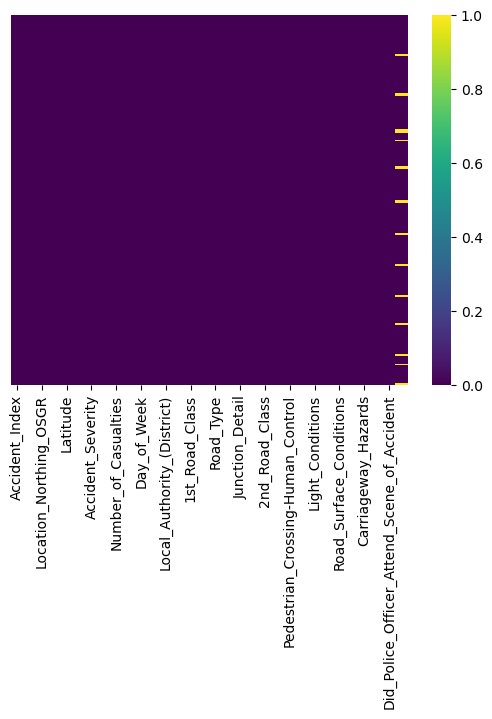

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

In [7]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [8]:
# for df
has_minus_one = (df == -1).any().any()
if has_minus_one:
    print("The CSV file contains the value -1.")
else:
    print("The CSV file does not contain the value -1.")
    

    
# for data 
has_minus_one = (data == -1).any().any()
if has_minus_one:
    print("The CSV file contains the value -1.")
else:
    print("The CSV file does not contain the value -1.")

The CSV file contains the value -1.
The CSV file contains the value -1.


In [9]:
# for df
null_values = df.isnull().sum()
print(null_values)


# for data
null_values = data.isnull().sum()
print(null_values)

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [158]:

# Handling Missing Values
data = data.dropna()
df = df.dropna()


# Handling -1 values
df = df[df != -1].dropna()
data = data[data != -1].dropna()


# Duplicate Data
data.drop_duplicates()  
df.drop_duplicates()  



,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0.0,5.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002909
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,0.0,0.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002875
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,0.0,5.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002900
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,0.0,8.0,1,1.0,1.0,0.0,0.0,1,1.0,E01002875
10,200501BS00012,526240.0,178900.0,-0.182872,51.494902,1,3,1,1,16/01/2005,...,0.0,5.0,4,1.0,1.0,0.0,0.0,1,1.0,E01002835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772179,201563DP43015,306050.0,261530.0,-3.377428,52.243906,63,2,1,2,31/12/2015,...,0.0,0.0,4,1.0,2.0,0.0,0.0,2,1.0,W01000454
1772181,201563DP43215,295950.0,284730.0,-3.532496,52.450585,63,3,1,1,23/12/2015,...,0.0,0.0,1,1.0,2.0,0.0,0.0,2,2.0,W01000467
1772183,201563DP43415,310890.0,291570.0,-3.314558,52.514705,63,3,2,1,31/10/2015,...,0.0,0.0,1,1.0,1.0,0.0,0.0,1,2.0,W01000480
1772184,201563DP43515,322750.0,299770.0,-3.141741,52.590219,63,3,2,2,31/10/2015,...,0.0,0.0,1,1.0,1.0,0.0,0.0,2,2.0,W01000441


In [13]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [14]:
# for df
has_minus_one = (df == -1).any().any()
if has_minus_one:
    print("The CSV file contains the value -1.")
else:
    print("The CSV file does not contain the value -1.")
    

    
# for data 
has_minus_one = (data == -1).any().any()
if has_minus_one:
    print("The CSV file contains the value -1.")
else:
    print("The CSV file does not contain the value -1.")

The CSV file does not contain the value -1.
The CSV file does not contain the value -1.


In [15]:
# for df
null_values = df.isnull().sum()
print(null_values)


# for data
null_values = data.isnull().sum()
print(null_values)

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

<Axes: >

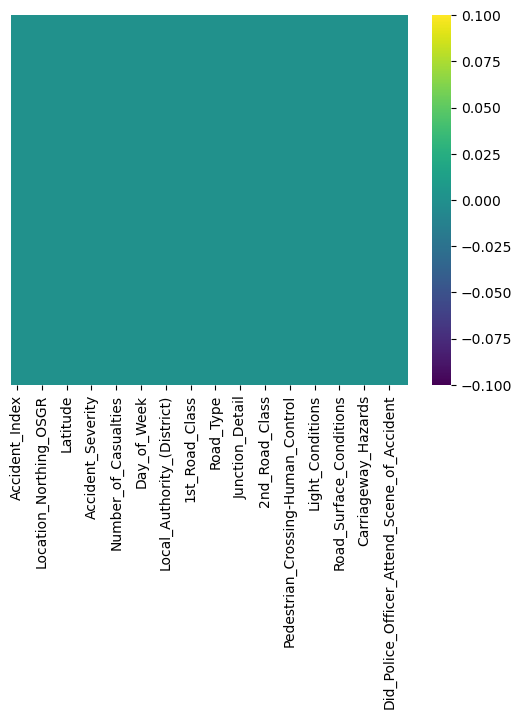

In [16]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

<Axes: >

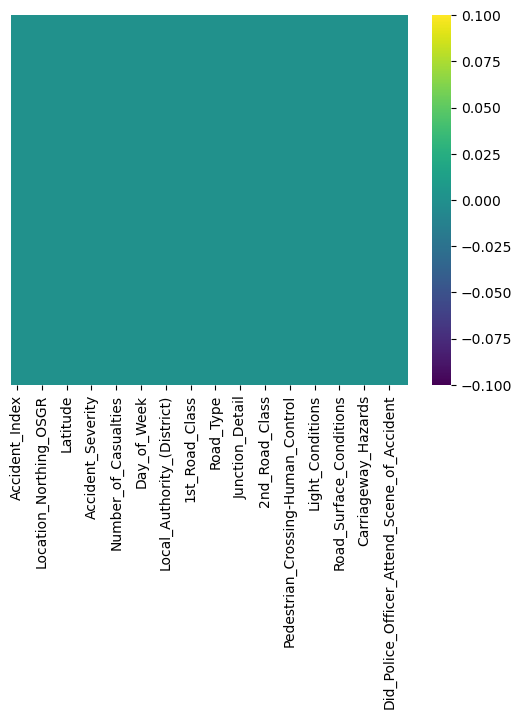

In [17]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis")

# filtering

In [159]:
# make new column counting many accidents
data['sum_of_accidents'] = data['Junction_Location'] + data['Skidding_and_Overturning'] + data['Hit_Object_in_Carriageway'] + data['Vehicle_Leaving_Carriageway']+data['Hit_Object_off_Carriageway']
# check if that person had accidents or not if note so i will drop it 
data = data.drop(data[data['sum_of_accidents'] <= 0].index)
# drop sum_of_accidents becouse useless now
data = data.drop('sum_of_accidents', axis=1)


# sorting index after cleaning
data = data.reset_index(drop=True)

# counter of accident
Num_of_Accident = data.shape[0]



In [160]:
labeler = LabelEncoder()

In [161]:
df['Time'] = labeler.fit_transform(df['Time'])

df['Local_Authority_(Highway)'] = labeler.fit_transform(df['Local_Authority_(Highway)'])

df['LSOA_of_Accident_Location'] = labeler.fit_transform(df['LSOA_of_Accident_Location'])

# graph to present accidents between genders

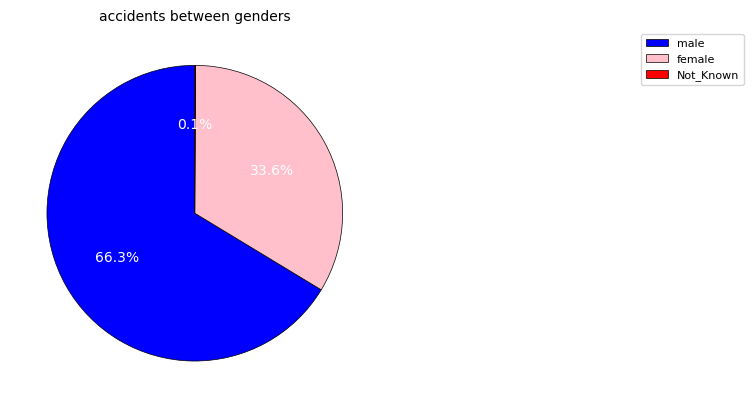

In [55]:

counts = data.groupby('Sex_of_Driver').size()

mylabels = ["male", "female", "Not_Known"]

# Create pie chart.
fig, ax = plt.subplots()

# Plot pie chart.
plt.pie(counts,colors=["blue","pink", "red"], labels = mylabels, autopct='%1.1f%%',startangle = 90, 
        wedgeprops = {"edgecolor" : "black",'linewidth': 0.5,'antialiased': True})


# Set autopct text color.
for text in ax.texts:
    text.set_color('white')

# Show plot.
plt.title(label='accidents between genders',  fontdict={"fontsize":10})
plt.legend(loc='upper right', bbox_to_anchor=(2,1),prop={'size': 8})
plt.show()

#  Bar Plot graph between Accidents & Age Band of Driver 

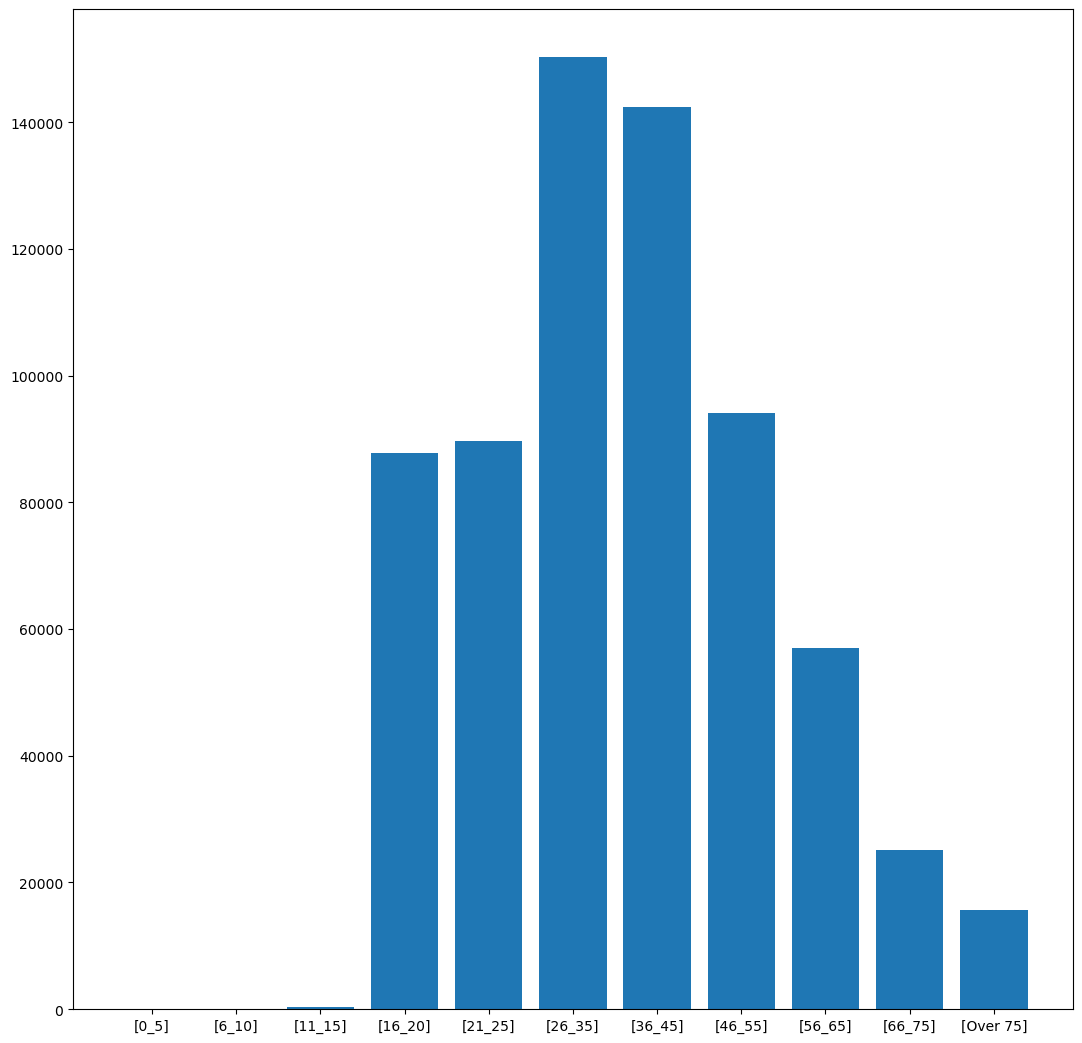

In [48]:
age_group=['[0_5]','[6_10]','[11_15]','[16_20]','[21_25]','[26_35]','[36_45]','[46_55]','[56_65]','[66_75]','[Over 75]']


data4 = [len(age_group_0_5.index),len(age_group_6_10.index),len(age_group_11_15.index),len(age_group_16_20.index),len(age_group_21_25.index),len(age_group_26_35.index),len(age_group_36_45.index),len(age_group_46_55.index),len(age_group_56_65.index),len(age_group_66_75.index),len(age_group_Over_75.index)]

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_axes([0,0,1,1])

ax2.bar(age_group,data4)
plt.show()

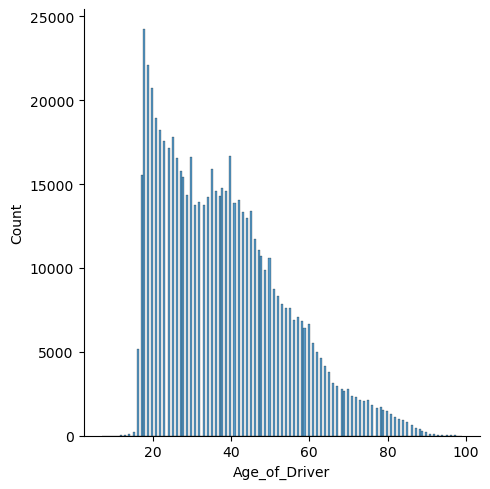

<Figure size 1000x1000 with 0 Axes>

In [49]:

#Normalizing our data
sns.displot(data['Age_of_Driver']);
fig = plt.figure(figsize=(10,10))

# Age_of_Vehicle

<Figure size 640x480 with 0 Axes>

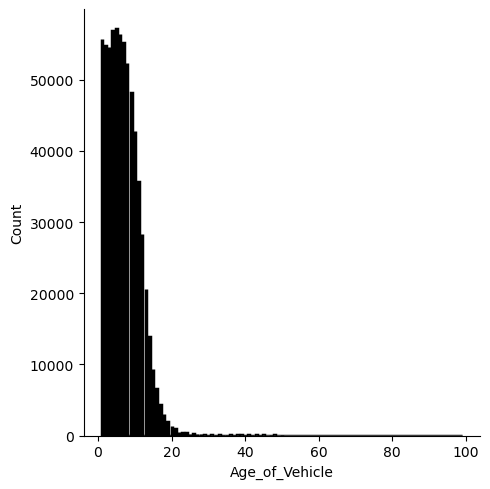

In [40]:
fig = plt.figure()
sns.displot(data['Age_of_Vehicle'], linewidth=2.5)
plt.show()

# Graph between of Accidents & Driver Home Area Type

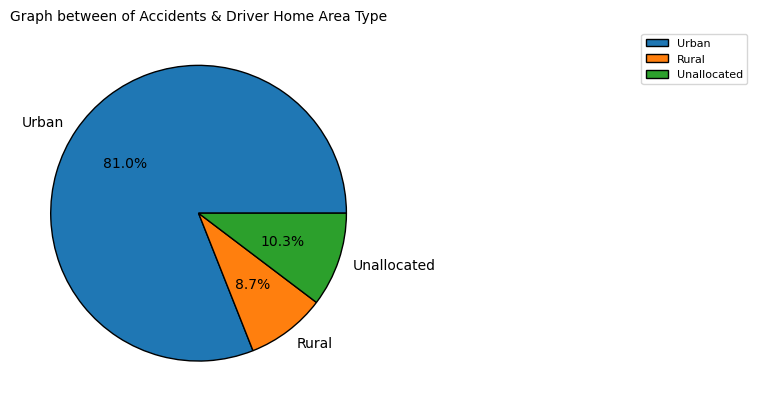

In [46]:
Driver_Home_Area_Type =['Urban','Rural','Unallocated']

data1 = [len(Urban.index),len(Rural.index),len(Unallocated.index)]

fig, ax = plt.subplots()

ax.pie(data1, labels=Driver_Home_Area_Type, autopct='%1.1f%%', wedgeprops = {"linewidth":1, "edgecolor": "black"})

plt.title(label='Graph between of Accidents & Driver Home Area Type',  fontdict={"fontsize":10})
plt.legend(loc='upper right', bbox_to_anchor=(2,1),prop={'size': 8})

#show plot
plt.show()

# Graphs Weather_Conditions and Road_Type

<Axes: >

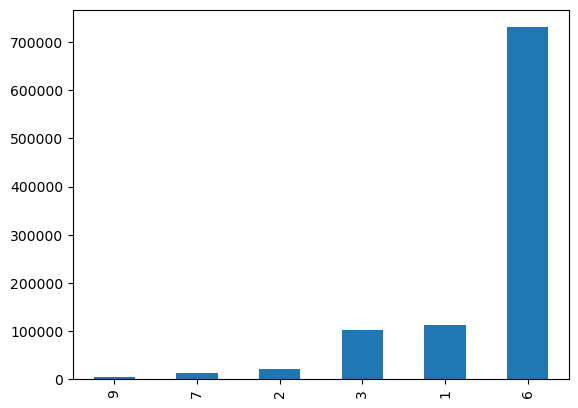

In [56]:
df["Road_Type"].value_counts().sort_values().plot.bar()

<Axes: >

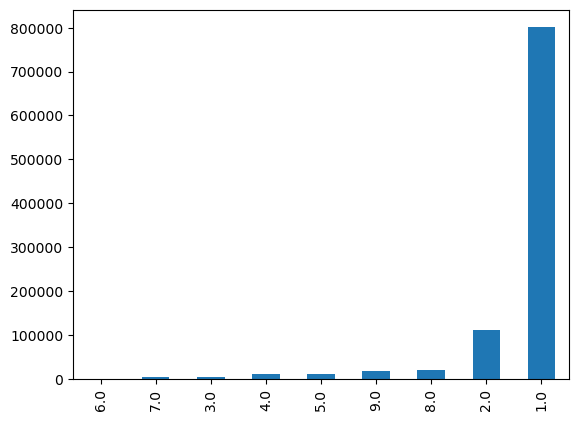

In [57]:
df["Weather_Conditions"].value_counts().sort_values().plot.bar()

# Graphs Number of Casualities and Road_Type

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

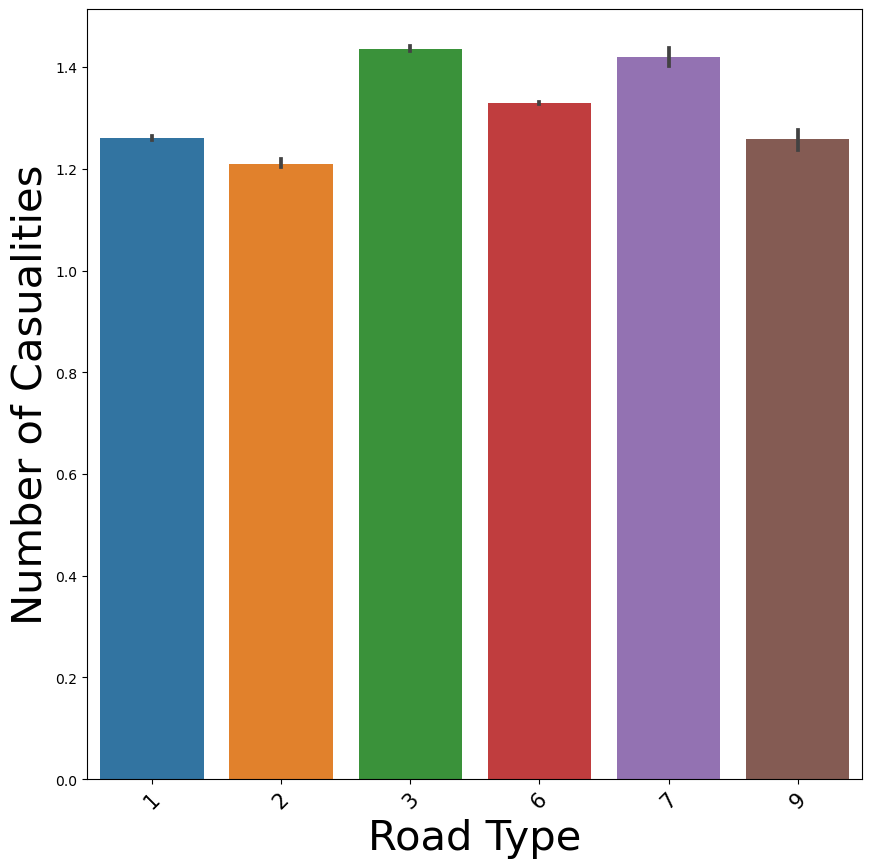

In [61]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Road_Type", y = "Number_of_Casualties", data = df, ax = ax)
plt.ylabel("Number of Casualities", fontsize = 30)
plt.xlabel("Road Type", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

# Graphs Number of Casualities and Weather Conditions

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0')])

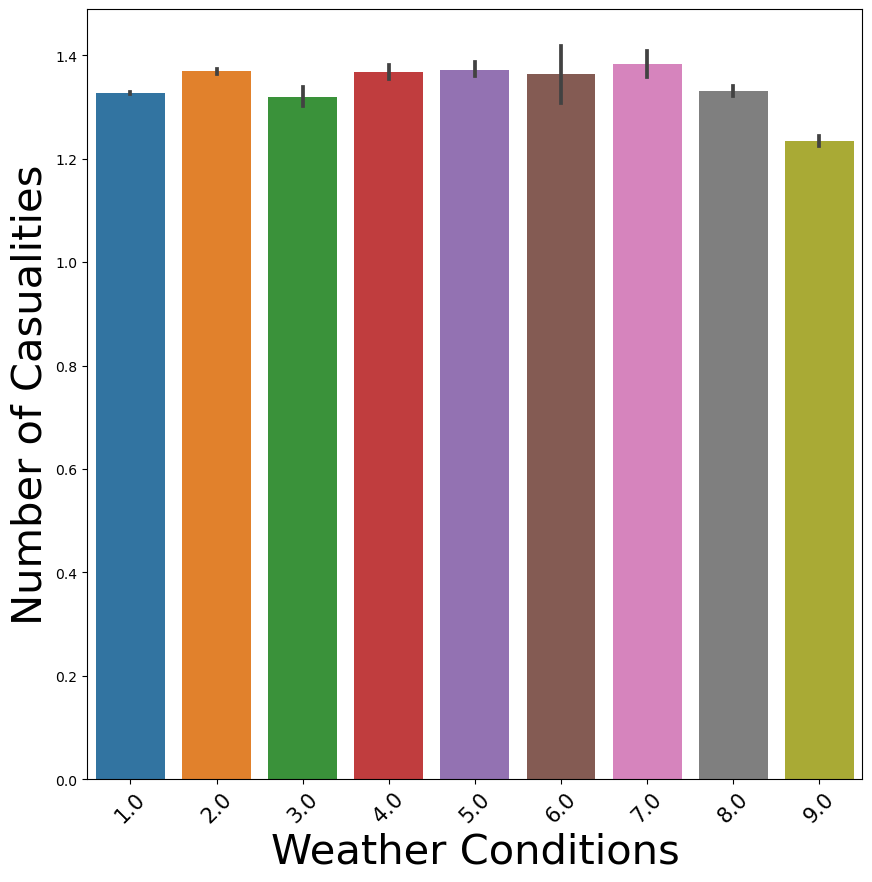

In [62]:


fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Weather_Conditions", y = "Number_of_Casualties", data = df, ax = ax)
plt.ylabel("Number of Casualities", fontsize = 30)
plt.xlabel("Weather Conditions", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)



# Graphs Accident Severity and Road Type

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '9')])

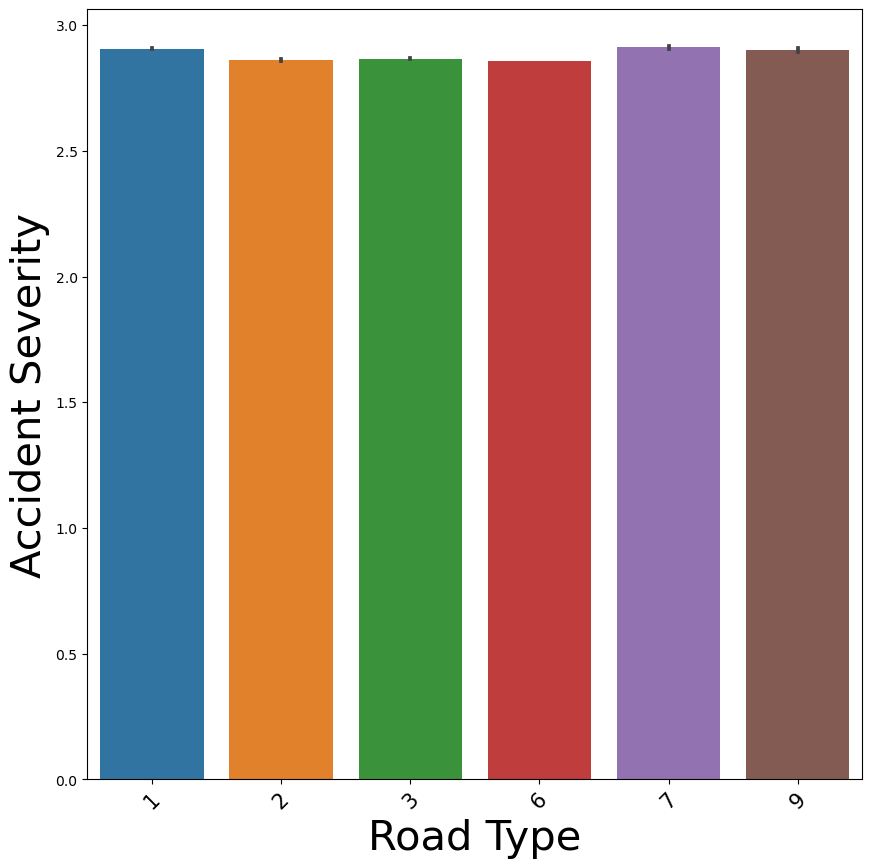

In [63]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Road_Type", y = "Accident_Severity", data = df, ax = ax)
plt.ylabel("Accident Severity", fontsize = 30)
plt.xlabel("Road Type", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

In [107]:
Front = data[data['1st_Point_of_Impact'].isin([1])]

Back = data[data["1st_Point_of_Impact"].isin([2])]

Offside = data[data["1st_Point_of_Impact"].isin([3])]

Nearside = data[data["1st_Point_of_Impact"].isin([4])]

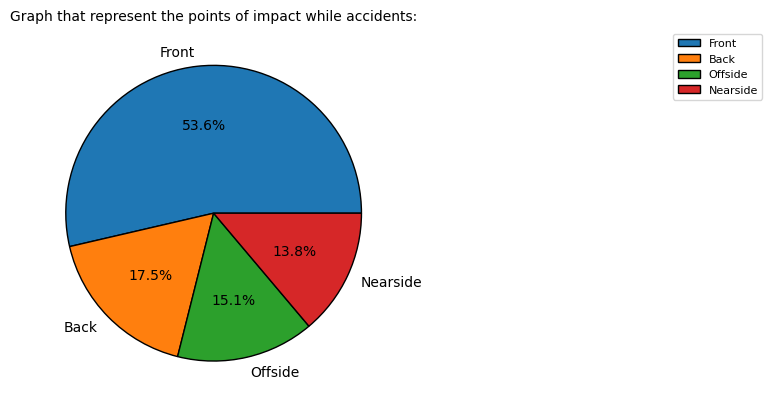

In [108]:
x = ['Front' , 'Back' , 'Offside' , 'Nearside']

data1 = [len(Front.index)/Num_of_Accident,len(Back.index)/Num_of_Accident,len(Offside.index)/Num_of_Accident, len(Nearside.index)/Num_of_Accident]

fig, ax = plt.subplots()

ax.pie(data1, labels=x, autopct='%1.1f%%', wedgeprops = {"linewidth":1, "edgecolor": "black"})

plt.title(label='Graph that represent the points of impact while accidents:',  fontdict={"fontsize":10})
plt.legend(loc='upper right', bbox_to_anchor=(2,1),prop={'size': 8})

#show plot
plt.show()



# graph of  Type of Accidents

In [64]:
# Create a new column to count accident
data['Num_Junction_Location'] = 0
data['Num_Hit_Object_in_Carriageway'] = 0
data['Num_Hit_Object_off_Carriageway'] = 0
data['Num_Vehicle_Leaving_Carriageway'] = 0


# Iterate over each row
# Check if the specified column exists in the DataFrame
if 'Junction_Location' in data.columns:
    # Iterate over each row
    for index, row in data.iterrows():
        # Check if the specific column value is greater than zero
        if row['Junction_Location'] > 0:
            # Set the value of 'Num_Junction_Location to 1
            data.at[index, 'Num_Junction_Location'] = 1
        
        if row['Hit_Object_in_Carriageway'] > 0:
            # Set the value of 'Num_Hit_Object_in_Carriageway' to 1
            data.at[index, 'Num_Hit_Object_in_Carriageway'] = 1
        
        if row['Hit_Object_off_Carriageway'] > 0:
            # Set the value of 'Num_Hit_Object_off_Carriageway' to 1
            data.at[index, 'Num_Hit_Object_off_Carriageway'] = 1
        
        if row['Vehicle_Leaving_Carriageway'] > 0:
            # Set the value of 'Num_Vehicle_Leaving_Carriageway' to 1
            data.at[index, 'Num_Vehicle_Leaving_Carriageway'] = 1
else:
    print("Specified column does not exist.")
data


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Driver_IMD_Decile,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident,Num_Junction_Location,Num_Hit_Object_in_Carriageway,Num_Hit_Object_off_Carriageway,Num_Vehicle_Leaving_Carriageway
0,200501BS00003,1,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,...,2.0,1.0,3.0,3.0,6.0,6.0,0,1,0,0
1,200501BS00007,2,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,6.0,1.0,3.0,3.0,6.0,6.0,1,0,0,0
2,200501BS00009,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,...,6.0,1.0,3.0,3.0,6.0,6.0,0,0,0,1
3,200501BS00010,1,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,3.0,1.0,3.0,3.0,6.0,6.0,1,0,0,0
4,200501BS00011,1,11.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,2.0,1.0,3.0,3.0,2.0,2.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662405,201020W016830,1,9.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,...,10.0,1.0,3.0,3.0,6.0,6.0,0,0,0,0
662406,201020W016930,1,9.0,0.0,18.0,0.0,3.0,0.0,0.0,0.0,...,3.0,1.0,3.0,3.0,6.0,6.0,1,0,0,0
662407,201020W016930,2,9.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,...,2.0,1.0,2.0,2.0,3.0,3.0,1,0,0,0
662408,201020W016930,3,9.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,...,1.0,1.0,2.0,3.0,6.0,6.0,1,0,0,0


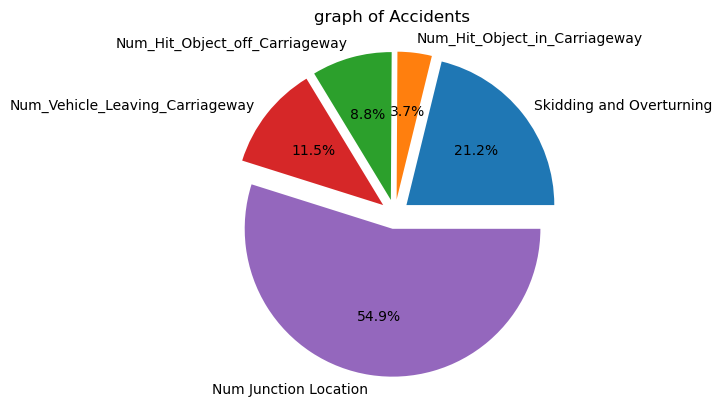

In [65]:

column1 = data['Skidding_and_Overturning']
column2 = data['Num_Hit_Object_in_Carriageway']
column3 = data['Num_Hit_Object_off_Carriageway']
column4 = data['Num_Vehicle_Leaving_Carriageway']
column5 = data['Num_Junction_Location']  

# Compute the sum of each column
sum1 = column1.sum()
sum2 = column2.sum()
sum3 = column3.sum()
sum4 = column4.sum()
sum5 = column5.sum()


# Create the pie chart
labels = ['Skidding and Overturning', 'Num_Hit_Object_in_Carriageway','Num_Hit_Object_off_Carriageway', 'Num_Vehicle_Leaving_Carriageway','Num Junction Location']
sizes = [sum1, sum2, sum3, sum4,sum5]
explode = (0.1, 0.1, 0.1,0.1,0.1)  
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')

# Customize the pie chart
plt.title('graph of Accidents ')

# Display the pie chart
plt.show()

# Data analysis

In [68]:

fatal = data[data["Accident_Severity"].isin([1])]
serious = data[data["Accident_Severity"].isin([2])]
slight = data[data["Accident_Severity"].isin([3])]

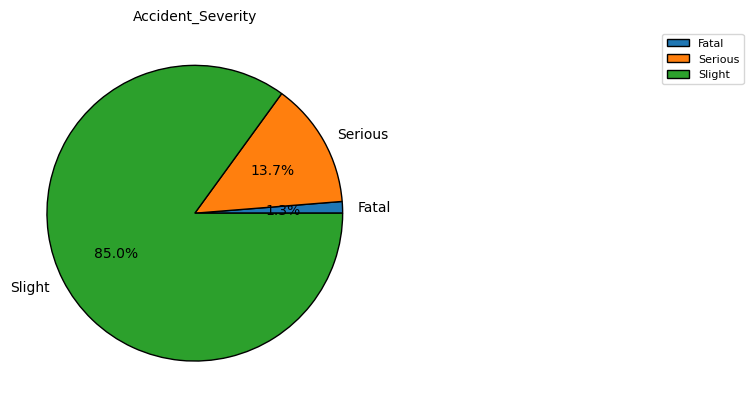

In [69]:
Accident_Severity =['Fatal','Serious','Slight']

data1 = [len(fatal.index),len(serious.index),len(slight.index)]

fig, ax = plt.subplots()

ax.pie(data1, labels=Accident_Severity , autopct='%1.1f%%', wedgeprops = {"linewidth": 1, "edgecolor": "black"})

plt.title(label='Accident_Severity',  fontdict={"fontsize":10})
plt.legend(loc='upper right', bbox_to_anchor=(2,1),prop={'size': 8})

#show plot
plt.show()

<Axes: xlabel='Road_Type', ylabel='count'>

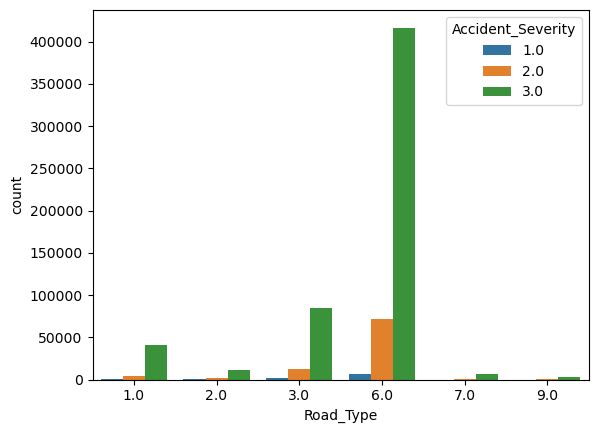

In [72]:
sns.countplot(data=data, x='Road_Type', hue='Accident_Severity')

<Axes: xlabel='LSOA_of_Accident_Location', ylabel='Count'>

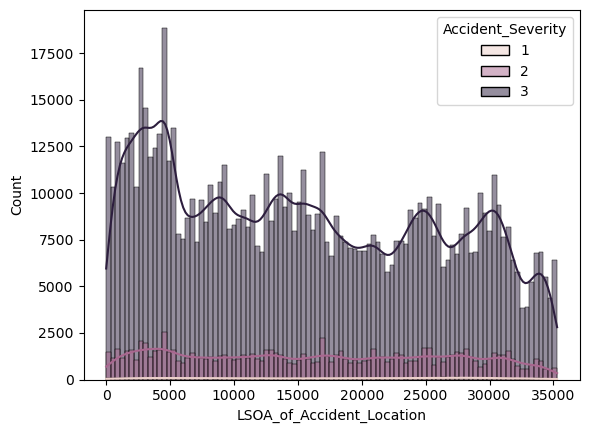

In [100]:
plt.figure()
sns.histplot(x = 'LSOA_of_Accident_Location', hue = 'Accident_Severity', data = df , kde=True )

<Axes: xlabel='Time', ylabel='Count'>

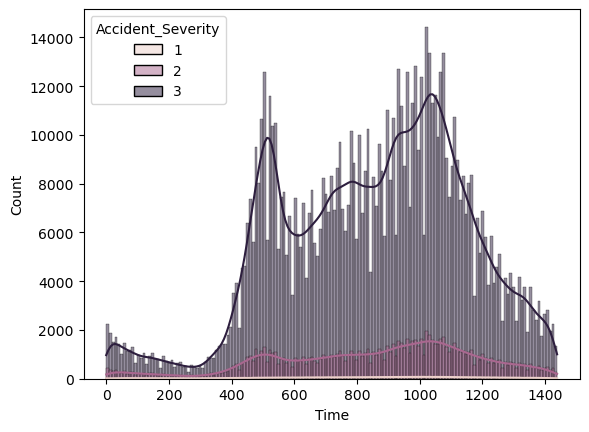

In [101]:
plt.figure()
sns.histplot(x = 'Time', hue = 'Accident_Severity', data = df , kde=True )

<Axes: xlabel='Day_of_Week', ylabel='Count'>

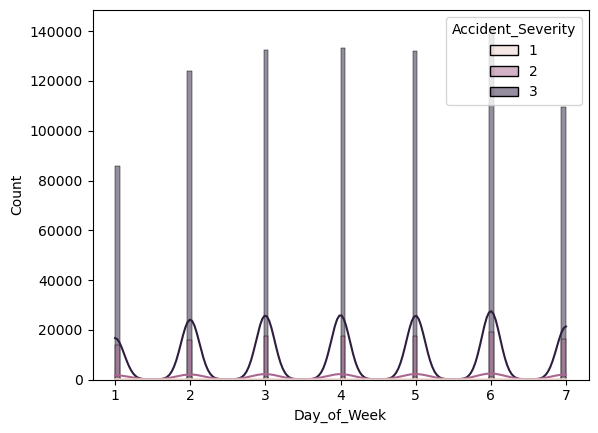

In [103]:
plt.figure()
sns.histplot(x = 'Day_of_Week', hue = 'Accident_Severity', data = df , kde=True )

# ML

In [162]:
data.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00003,1,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,...,6.0,8300.0,2.0,5.0,2.0,1.0,3.0,3.0,6.0,6.0
1,200501BS00007,2,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,7.0,4266.0,1.0,4.0,6.0,1.0,3.0,3.0,6.0,6.0
2,200501BS00009,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,...,10.0,5343.0,1.0,16.0,6.0,1.0,3.0,3.0,6.0,6.0
3,200501BS00010,1,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,6.0,1998.0,1.0,13.0,3.0,1.0,3.0,3.0,6.0,6.0
4,200501BS00011,1,11.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,8268.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0


In [163]:
#Features 
X = data[[ "Vehicle_Type" ,	 "Driver_Home_Area_Type"	, "Casualty_Severity" , 	"Road_Type"	, "Did_Police_Officer_Attend_Scene_of_Accident" ]]

#Target
y = data["Casualty_Severity"]


In [164]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662410 entries, 0 to 662409
Data columns (total 5 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Vehicle_Type                                 662410 non-null  float64
 1   Driver_Home_Area_Type                        662410 non-null  float64
 2   Casualty_Severity                            662410 non-null  float64
 3   Road_Type                                    662410 non-null  float64
 4   Did_Police_Officer_Attend_Scene_of_Accident  662410 non-null  float64
dtypes: float64(5)
memory usage: 25.3 MB


In [ ]:
y.head()

In [165]:
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [166]:
X[1]

array([-0.06693462, -0.45585401,  0.36021051,  0.50824165,  0.50824165])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [177]:
X_train

array([[-0.06693462,  1.0993778 ,  0.36021051,  0.50824165,  0.50824165],
       [-0.06693462, -0.45585401,  0.36021051, -1.3143011 , -1.3143011 ],
       [-0.06693462, -0.45585401,  0.36021051,  0.50824165,  0.50824165],
       ...,
       [-1.36374496, -0.45585401,  0.36021051,  0.50824165,  0.50824165],
       [-0.06693462, -0.45585401,  0.36021051,  0.50824165,  0.50824165],
       [-0.06693462, -0.45585401,  0.36021051, -1.3143011 , -1.3143011 ]])

In [178]:
y_train

532086    3.0
380253    3.0
145300    3.0
21660     3.0
519268    3.0
         ... 
644167    3.0
259178    3.0
365838    3.0
131932    3.0
121958    3.0
Name: Casualty_Severity, Length: 529928, dtype: float64

In [179]:
print('X_train shape : ' , X_train.shape)
print('X_test shape  : ' , X_test.shape)
print('y_train shape : ' , y_train.shape)
print('y_test shape  : ' , y_test.shape)

X_train shape :  (529928, 5)
X_test shape  :  (132482, 5)
y_train shape :  (529928,)
y_test shape  :  (132482,)


In [180]:
treemodel = DecisionTreeClassifier()

In [181]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5]
}

In [182]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(treemodel,parameter,scoring='accuracy',cv=5)



In [183]:
cv.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [184]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [185]:
y_predtree = cv.predict(X_test)


In [186]:
from sklearn.metrics import accuracy_score


In [187]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, cv.predict(X_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, cv.predict(X_test))))

Train accuracy :1.00
Test accuracy :1.00


In [190]:


random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

         1.0   1.000000  1.000000  1.000000      1439
         2.0   1.000000  1.000000  1.000000     14723
         3.0   1.000000  1.000000  1.000000    116320

    accuracy                       1.000000    132482
   macro avg   1.000000  1.000000  1.000000    132482
weighted avg   1.000000  1.000000  1.000000    132482



Predicted,1.0,2.0,3.0,All
Actual,,,,
1.0,1439,0,0,1439
2.0,0,14723,0,14723
3.0,0,0,116320,116320
All,1439,14723,116320,132482
